In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Import for GridSearch
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer 

In [2]:
df_test = pd.read_csv('aug_test.csv')
df_train = pd.read_csv('aug_test.csv')


In [3]:
#Only do this for numbers


    
#should we do something different here? Experience=Experience in years
    
def experienceN(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 1
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def companySizeN(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
#We set a boundary on >4 = 1 and <4 = 0
def lastNewJobN(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 0
    if x=='2'            :   return 0
    if x=='3'            :   return 0
    if x=='4'            :   return 0
    if x=='>4'           :   return 1

In [4]:
df_train['experience'] = df_train['experience'].apply(experienceN)
df_train['company_size'] = df_train['company_size'].apply(companySizeN)
df_train['last_new_job'] = df_train['last_new_job'].apply(lastNewJobN)

In [5]:
df_train = df_train.fillna(df_train.mean(numeric_only=True))
df_train.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  0
company_size                0
company_type              634
last_new_job                0
training_hours              0
dtype: int64

In [6]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,0.000000,NaN,0.0,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,3.184472,Pvt Ltd,0.0,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,0.0,3.184472,Pvt Ltd,0.0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,1.000000,Pvt Ltd,0.0,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,4.000000,Pvt Ltd,1.0,72


In [7]:
df_train['last_new_job'] = df_train['last_new_job'].astype(int)

Logistic Regression

In [8]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [9]:
#X_train = df_train[['gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_type', 'company_size', 'city']]
#y_train = df_train['last_new_job']
#logr = LogisticRegression()
#logr.fit(X_train,y_train)

#print score
#print("Score: {:.3f}".format(logr.score(X_train, y_train)))

#print coefficient
#coefficient = logr.coef_
#print(coefficient)

Decision tree classifier

In [10]:
X_train = df_train[['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_type', 'company_size', 'city']]
y_train = df_train['last_new_job']


X_train = pd.get_dummies(X_train)


In [11]:
dtree = tree.DecisionTreeClassifier(random_state = 17) 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [15]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))

Accuracy on training set: 0.970


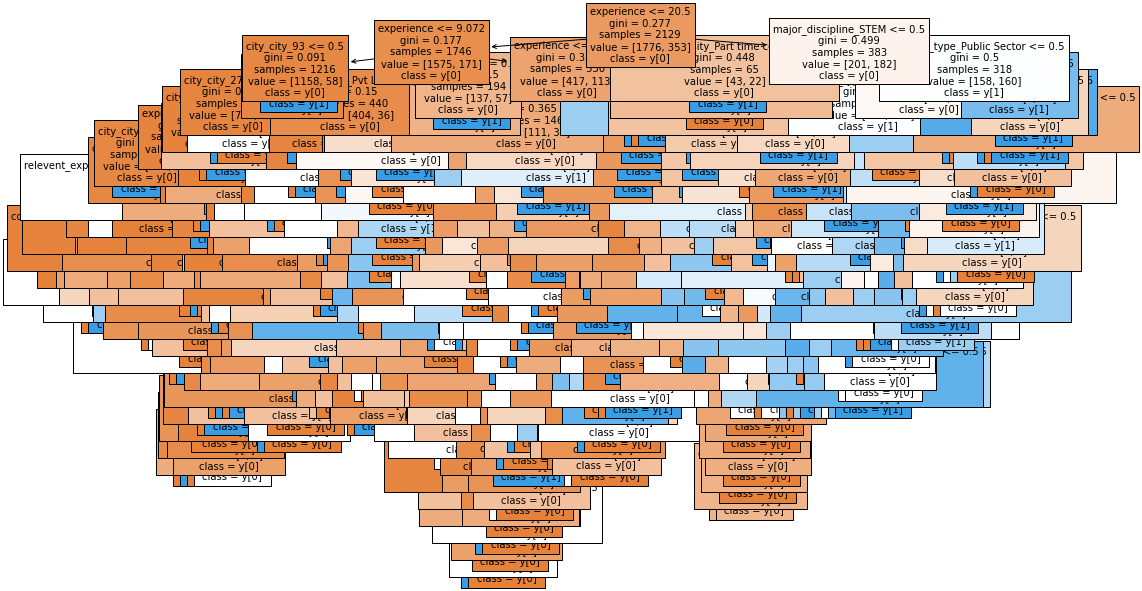

In [13]:
plt.figure(figsize=(17,10))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=True,
               feature_names=list(X_train.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('big_tree.png', bbox_inches='tight') # save plot as png file 

In [14]:
param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 17],
                         'min_samples_leaf': [5, 8, 11]},

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring = 'accuracy', cv=5, verbose = 5)
grid.fit(X_train, y_train)

# print the best score obtained
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

# print the parameters that acheived the best score
print("Best parameters: ", grid.best_params_)
        

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.810 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.810 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.840 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.838 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.810 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.810 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.840 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.838 total time=   0.0s

Testing the model

In [ ]:
df_test['gender'] = df_test['gender'].apply(genderN)
df_test['relevent_experience'] = df_test['relevent_experience'].apply(relevantExperienceN)
df_test['enrolled_university'] = df_test['enrolled_university'].apply(enrollmentUniversityN)
df_test['education_level'] = df_test['education_level'].apply(educationLevelN)
df_test['major_discipline'] = df_test['major_discipline'].apply(majorDisciplineN)
df_test['experience'] = df_test['experience'].apply(experienceN)
df_test['company_type'] = df_test['company_type'].apply(companyTypeN)
df_test['company_size'] = df_test['company_size'].apply(companySizeN)
df_test['last_new_job'] = df_test['last_new_job'].apply(lastNewJobN)
df_test['city'] = df_test['city'].apply(CDIN)



In [ ]:
df_test = df_test.fillna(df_test.mean(numeric_only=True))
df_test.isna().sum()

In [17]:
df_test['last_new_job'] = df_test['last_new_job'].astype(int)

In [18]:
X_test = df_test[['gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_type', 'company_size', 'city']]
y_test = df_test['last_new_job']

In [19]:
y_pred=dtree.predict(X_test)

In [20]:
print('Accuracy: ', sum(y_test==y_pred)/len(y_test)) # by hand

from sklearn import metrics # by using metrics library
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9722874589008924
Accuracy:  0.9722874589008924
